In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import traceback
import logging
from kneed import KneeLocator, DataGenerator as dg
from kmeans import Kmeans
from hierarchial import Hierarchical

In [2]:
class DataDf:
    """Data class.
    The purpose of this class is to use it as a component of any clustering class, instead of 
    reloading data  as a seperate dataframe into the memory.
    
    Parameters
    ----------
    df : dataframe
        The dataframe contains the data with any type of attributes.
           
    """

    def __init__(self):
        """Attributes are defined here."""
        self.df = None
        
    def read_data(self, file_path):
        result ={}
        try:
            self.df = pd.read_csv(file_path)
            result['msg'] = 'File Read!'
            result['flag'] = True
        except Exception as e:
            result['msg'] =  f'{e.__class__} occurred!'
            result['flag'] = False
        return result
    

interactive(children=(Dropdown(description='Clustering', options=('Kmeans', 'Hierarchial'), value='Kmeans'), O…

FloatText(value=4.0, description='No of K:')

Checkbox(value=False, description='Set Automatically')

interactive(children=(Dropdown(description='Scaling', options=('z-scaling', 'min_max', 'absolute'), value='z-s…

Button(description='Run Clustering', style=ButtonStyle(), tooltip='Run Clustering')

scaling_type: z-scaling | max_iteratoins: None | k: None
Scaling: 
 Z-scaling
In find_the_best_k() 



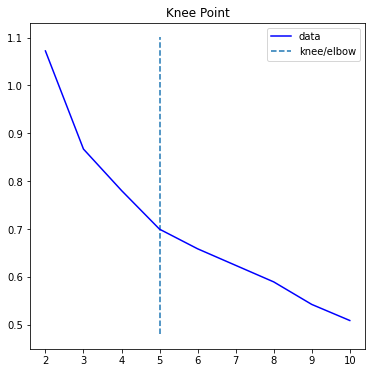

In [3]:
from ipywidgets import interact, Dropdown, FloatText, Button, Checkbox, VBox


clutering_type = Dropdown(options = ['Kmeans','Hierarchial'], description='Clustering')

data_scaling_dd = Dropdown(options = ['z-scaling','min_max','absolute'], description='Scaling')
P=None

def update_cityW_options(*args): # *args represent zero (case here) or more arguments.
    print(productsW.value)


@interact(product = clutering_type)
def print_clustering_type(product):
    print(product)
    
no_of_k = FloatText(
 value=4.0,
 description='No of K:'
 )
display(no_of_k)

box = Checkbox(False, description='Set Automatically')
display(box)

def changed(cb):
    if box.value==True:
        no_of_k.disabled=True
        #no_of_k.layout.visibility = "hidden"
    else:
        no_of_k.disabled=False
        #no_of_k.layout.visibility = "visible"

box.observe(changed)

@interact(scaling = data_scaling_dd)
def print_scaling(scaling):
    print(scaling)


button = Button(
    description='Run Clustering',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Run Clustering',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
display(button)

def on_button_clicked(b):
    FILE_PATH = 'data/Iris_2.csv'
    dataObj = DataDf()
    rslt = dataObj.read_data(FILE_PATH)
    
    if clutering_type.value == 'Kmeans':
        metrics_variables = dataObj.df.columns.to_list()[1:5]
        #print(metrics_variables)
        cluster_by = dataObj.df.columns.to_list()[0]
        data_scaling = data_scaling_dd.value
        if no_of_k.disabled:
            no_of_clusters = None
        else:
            no_of_clusters = int(no_of_k.value)
            
        max_iterations = 50
        metric = None

        result = None
        kmeansObj = None
        if rslt['flag']:
            kmeansObj = Kmeans(dataObj,cluster_by,metrics_variables)
            result = kmeansObj.perform_clustering(data_scaling,k=no_of_clusters)

        kl = KneeLocator(result['data']['elbow_chart']['x'], result['data']['elbow_chart']['y'], curve="convex", direction="decreasing")
        kl.plot_knee()
        result
button.on_click(on_button_clicked)

In [ ]:
FILE_PATH = 'data/Iris_2.csv'
dataObj = DataDf()
rslt = dataObj.read_data(FILE_PATH)

## K-means

In [ ]:
metrics_variables = dataObj.df.columns.to_list()[1:5]
print(metrics_variables)
cluster_by = dataObj.df.columns.to_list()[0]
data_scaling = 'z-scaling'
no_of_clusters = None
max_iterations = 50
metric = None

result = None
kmeansObj = None
if rslt['flag']:
    kmeansObj = Kmeans(dataObj,cluster_by,metrics_variables)
    result = kmeansObj.perform_clustering(data_scaling,k=no_of_clusters)
result

In [ ]:
kl = KneeLocator(result['data']['elbow_chart']['x'], result['data']['elbow_chart']['y'], curve="convex", direction="decreasing")
kl.knee

In [ ]:
kl.plot_knee()

## Hierarchial Clustering

In [ ]:
FILE_PATH = 'data/Iris_2.csv'
dataObj2 = DataDf()
rslt = dataObj2.read_data(FILE_PATH)

In [ ]:
metrics_variables = dataObj2.df.columns.to_list()[1:5]
print(metrics_variables)
cluster_by = dataObj2.df.columns.to_list()[0]
data_scaling = 'z-scaling'
no_of_clusters = 3
max_iterations = 5
metric = None
categorical_colms = None
print(categorical_colms)

# ------------------------------------------------------------
# Hierarchical Obj initializatoin
hClusteringObj = Hierarchical(dataObj2,cluster_by, metrics_variables, categorical_colms)
result = hClusteringObj.perform_clustering(data_scaling)

In [ ]:
dataObj.df

In [ ]:
result